In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
from ipynb.fs.full.DataCleaningProcess import cleanData

In [109]:
cleanData = cleanData()

In [4]:
cleanData.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Humidity(%),...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,weather_keyword,Year,Month,Date,Hour,Weekday
116060,A-116062,3,27.981367,-82.326561,0.01,Tampa,Hillsborough,FL,80.6,70.0,...,False,False,Day,Day,overcast,2016,11,30,15,2
116061,A-116063,3,27.981367,-82.326561,0.01,Tampa,Hillsborough,FL,80.6,65.0,...,False,False,Day,Day,cloudy,2016,11,30,16,2
116062,A-116064,2,25.627699,-80.374451,0.01,Miami,Miami-Dade,FL,80.1,71.0,...,True,False,Day,Day,cloudy,2016,11,30,16,2
116063,A-116065,3,25.899435,-80.346680,0.01,Hialeah,Miami-Dade,FL,80.1,69.0,...,False,False,Day,Day,cloudy,2016,11,30,16,2
116064,A-116066,2,26.272926,-80.296432,0.01,Pompano Beach,Broward,FL,79.0,69.0,...,False,False,Day,Day,rain,2016,11,30,16,2


Exploratory Data Analysis

In [5]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223746 entries, 116060 to 2974015
Data columns (total 36 columns):
ID                   223746 non-null object
Severity             223746 non-null int64
Start_Lat            223746 non-null float64
Start_Lng            223746 non-null float64
Distance(mi)         223746 non-null float64
City                 223719 non-null object
County               223746 non-null object
State                223746 non-null object
Temperature(F)       220498 non-null float64
Humidity(%)          220118 non-null float64
Pressure(in)         221929 non-null float64
Visibility(mi)       221155 non-null float64
Wind_Direction       222007 non-null object
Wind_Speed(mph)      200873 non-null float64
Weather_Condition    221180 non-null object
Amenity              223746 non-null bool
Bump                 223746 non-null bool
Crossing             223746 non-null bool
Give_Way             223746 non-null bool
Junction             223746 non-null bool
No_Exi

Month vs Weekday

In [11]:
weekDayMonthMap = pd.pivot_table(cleanData,values='ID', index=['Weekday'],
                    columns=['Month'], aggfunc='count')

[Text(0, 0.5, 'Mon'),
 Text(0, 1.5, 'Tues'),
 Text(0, 2.5, 'Wed'),
 Text(0, 3.5, 'Thurs'),
 Text(0, 4.5, 'Fri'),
 Text(0, 5.5, 'Sat'),
 Text(0, 6.5, 'Sun')]

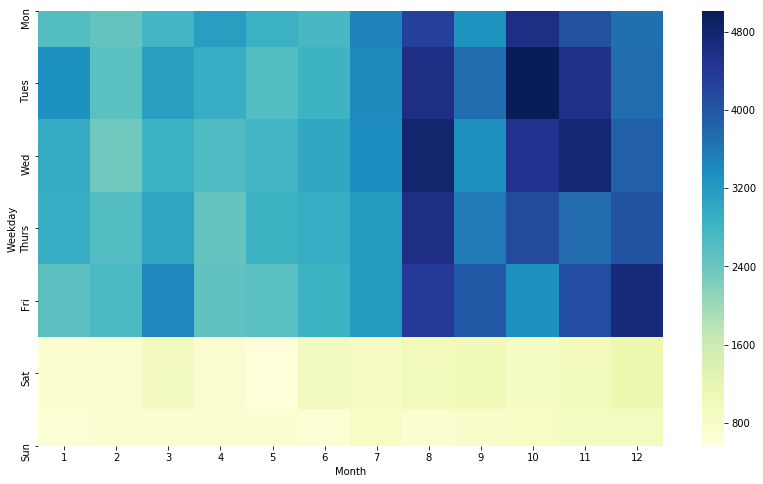

In [22]:
fig, ax = plt.subplots(figsize=(14,8))         # Sample figsize in inches

sns.heatmap(weekDayMonthMap, cmap="YlGnBu", ax = ax)
ax.set_yticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

We see that there are significanty higher number of accidents in the weekdays compared to weekends. This is due to
higher traffic for office-goers. Also, the accidents are more in August upto december due to colder weather and correspondingly 
adverse weather conditions. Surprisingly January has lesser accidents but that may be due to lesser vehicular traffic due to even harsh weather conditions.


Cities by number of accidents

In [28]:
citybyAccidents = cleanData.groupby('City').count()['ID']
sortedCityData = citybyAccidents.sort_values(ascending = False)

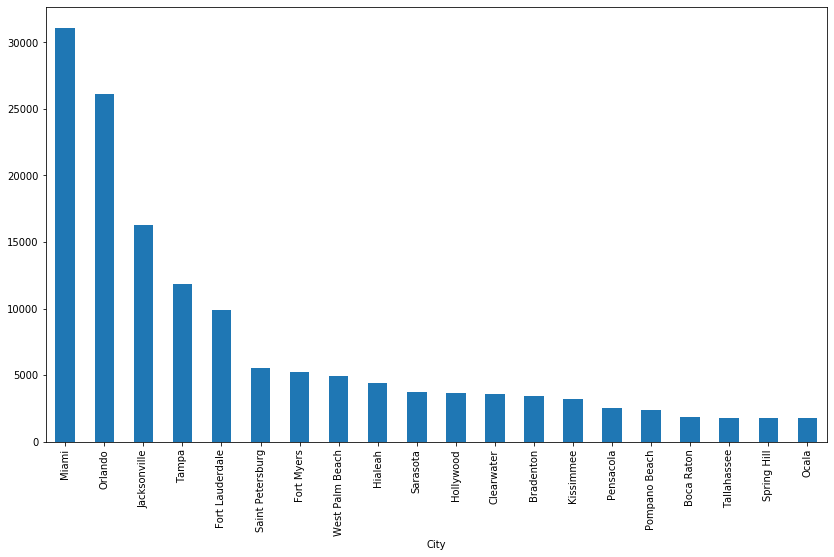

In [30]:
fig, ax = plt.subplots(figsize=(14,8)) 
sortedCityData[0:20].plot.bar()

The above data very well correlates with the population data of citites in Florida. Although Jacksonville is the most populous city in Florida, Miami has most accidents due to high population density. 

The road features where accidents take place. Could be helpful to figure out improvements need from govt side.

In [32]:
cleanData.columns

Index(['ID', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'City',
       'County', 'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'weather_keyword', 'Year', 'Month', 'Date', 'Hour',
       'Weekday'],
      dtype='object')

In [34]:
RoadData = cleanData[['Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]

In [40]:
featureCounts = {}
for col in RoadData.columns:
    featureCounts[col] = RoadData[RoadData[col] == True][col].count()


In [41]:
featureCounts

{'Amenity': 721,
 'Bump': 6,
 'Crossing': 23462,
 'Give_Way': 199,
 'Junction': 13241,
 'No_Exit': 324,
 'Railway': 770,
 'Roundabout': 32,
 'Station': 7203,
 'Stop': 732,
 'Traffic_Calming': 41,
 'Traffic_Signal': 60525,
 'Turning_Loop': 0}

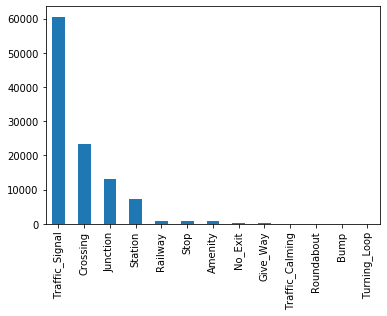

In [43]:
pd.Series(featureCounts).sort_values(ascending = False).plot.bar()

Most of the accidents have taken place near a traffic signal or a crossing or a junction. Which is expected behavior. So we expect to find probability of accidents near these points to be high.

Accidents vs Weather Conditions

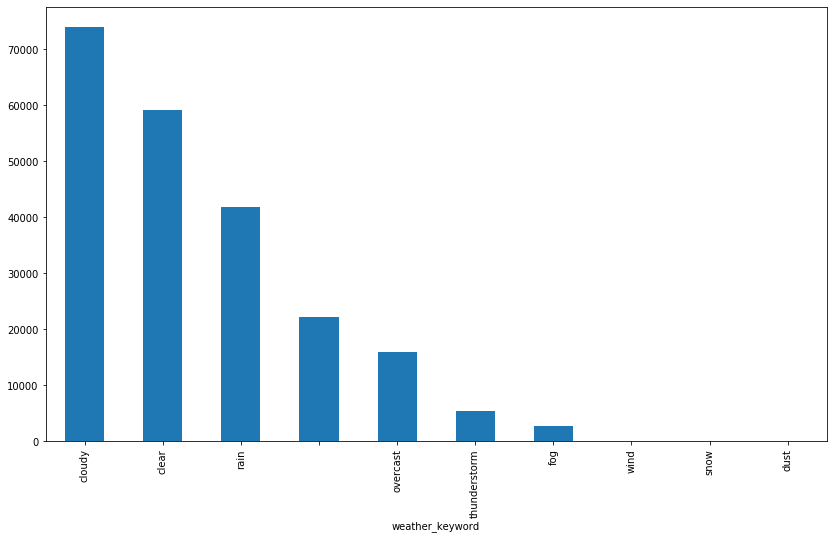

In [48]:
accidentsbyWeather = cleanData.groupby('weather_keyword').count()['ID']
sortedWeatherData = accidentsbyWeather.sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(14,8)) 
sortedWeatherData.plot.bar()

We observe that weather conditions donot relate much to accidents. Most accidents have taken place in clear/cloudy weather which are not extreme conditions. But this does not mean that there is no correlation. Since clear/cloudy weather conditions are comparably more abundant than others, we see those inflated numbers. 

In [49]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223746 entries, 116060 to 2974015
Data columns (total 36 columns):
ID                   223746 non-null object
Severity             223746 non-null int64
Start_Lat            223746 non-null float64
Start_Lng            223746 non-null float64
Distance(mi)         223746 non-null float64
City                 223719 non-null object
County               223746 non-null object
State                223746 non-null object
Temperature(F)       220498 non-null float64
Humidity(%)          220118 non-null float64
Pressure(in)         221929 non-null float64
Visibility(mi)       221155 non-null float64
Wind_Direction       222007 non-null object
Wind_Speed(mph)      200873 non-null float64
Weather_Condition    221180 non-null object
Amenity              223746 non-null bool
Bump                 223746 non-null bool
Crossing             223746 non-null bool
Give_Way             223746 non-null bool
Junction             223746 non-null bool
No_Exi

In [58]:
cleanData.dropna(axis=0, how='any', inplace = True)

C:\Users\sablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Using Clustering -> Since the accident points in the state might be too scattered to effectively predict the accident probability, we want to define another feature, Cluster. Cluster would basically identify the hotspots of accidents in the state. Places with more than 20 accidents within a range of 20 mts from one another would be put into a cluster.

In [73]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics.pairwise import haversine_distances
from math import radians


In [87]:
X = cleanData[['Start_Lat','Start_Lng']]

In [88]:
X['Start_Lat'] = [radians(_) for _ in X['Start_Lat']]
X['Start_Lng'] = [radians(_) for _ in X['Start_Lng']]
X

C:\Users\sablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Start_Lat,Start_Lng
116060,0.488367,-1.436870
116061,0.488367,-1.436870
116062,0.447288,-1.402799
116063,0.452030,-1.402314
116064,0.458549,-1.401437
...,...,...
2974002,0.529327,-1.447916
2974003,0.468508,-1.398089
2974004,0.513237,-1.416447
2974014,0.498241,-1.418432


In [103]:
db = DBSCAN(eps=0.00000313922, min_samples=20, metric="haversine").fit(X)

In [104]:
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1594

In [110]:
cleanData['Cluster'] = labels

C:\Users\sablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198373 entries, 116060 to 2974015
Data columns (total 37 columns):
ID                   198373 non-null object
Severity             198373 non-null int64
Start_Lat            198373 non-null float64
Start_Lng            198373 non-null float64
Distance(mi)         198373 non-null float64
City                 198373 non-null object
County               198373 non-null object
State                198373 non-null object
Temperature(F)       198373 non-null float64
Humidity(%)          198373 non-null float64
Pressure(in)         198373 non-null float64
Visibility(mi)       198373 non-null float64
Wind_Direction       198373 non-null object
Wind_Speed(mph)      198373 non-null float64
Weather_Condition    198373 non-null object
Amenity              198373 non-null bool
Bump                 198373 non-null bool
Crossing             198373 non-null bool
Give_Way             198373 non-null bool
Junction             198373 non-null bool
No_Exi

In [111]:
cleanData = cleanData[cleanData['Cluster'] != -1]

In [112]:
finalData = cleanData.copy()


In [113]:
finalData.shape

(81845, 37)

In [114]:
finalData.groupby('Cluster').count()['ID'].sort_values(ascending = False)

Cluster
182     521
79      454
88      431
223     394
5       393
       ... 
1149     20
348      20
1195     20
1198     20
1593     19
Name: ID, Length: 1594, dtype: int64

In [116]:
finalData.to_csv('finalDatawithClustering.csv',index = False)